In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
left = np.array([
    [1800, 0.45],
    [1750, 0.6],
    [1700, 0.8],
    [1650, 1.15],
    [1600, 1.925]])
    
right = np.array([
    [1390, 2.425],
    [1350, 1.55],
    [1300, 1.075],
    [1250, 0.775],
    [1200, 0.625]])

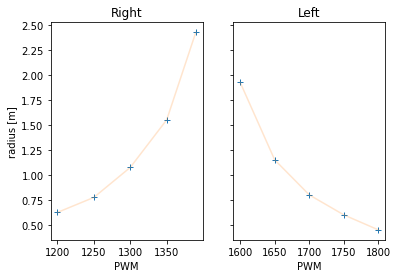

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.plot(right[:, 0], right[:, 1], '+')
ax1.plot(right[:, 0], right[:, 1], alpha=0.2)
ax1.set(xlabel="PWM", ylabel="radius [m]")
ax1.set_title("Right")

ax2.plot(left[:, 0], left[:, 1], '+')
ax2.plot(left[:, 0], left[:, 1], alpha=0.2)
ax2.set(xlabel="PWM")
ax2.set_title("Left")

plt.show()

In [5]:
import math

L=0.3
W=0.3

def delta(R):
    return math.atan2(L, R + W/2) / math.pi * 180

left_angles = np.array([[RPM, delta(R)] for [RPM, R] in left])
right_angles = np.array([[RPM, delta(R)] for [RPM, R] in right])

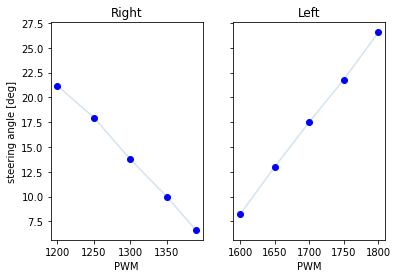

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax2.plot(left_angles[:, 0], left_angles[:, 1], alpha=0.2)
ax2.plot(left_angles[:, 0], left_angles[:, 1], 'ob')
ax2.set(xlabel="PWM")
ax2.set_title("Left")

ax1.plot(right_angles[:, 0], right_angles[:, 1], alpha=0.2)
ax1.plot(right_angles[:, 0], right_angles[:, 1], 'ob')
ax1.set(xlabel="PWM", ylabel="steering angle [deg]")
ax1.set_title("Right")

plt.show()

In [7]:
combined_angles = []

for [rpm, delta] in left_angles:
    combined_angles += [[rpm, delta]]

for [rpm, delta] in right_angles:
    combined_angles += [[rpm, -delta]]
    
combined_angles = np.array(combined_angles)
combined_angles

array([[1800.        ,   26.56505118],
       [1750.        ,   21.80140949],
       [1700.        ,   17.52556837],
       [1650.        ,   12.99461679],
       [1600.        ,    8.22672246],
       [1390.        ,   -6.64527821],
       [1350.        ,  -10.0079798 ],
       [1300.        ,  -13.76078511],
       [1250.        ,  -17.96913974],
       [1200.        ,  -21.16125982]])

In [8]:
x = combined_angles[:, 1]
y = combined_angles[:, 0]

A = np.vstack([x, np.ones(len(x))]).T
a, b = np.linalg.lstsq(A, y, rcond=None)[0]

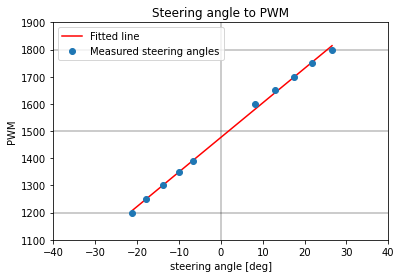



PWM(delta)=12.701*delta + 1476.686


In [9]:
plt.plot(x, a*x + b, 'r', label='Fitted line')
plt.plot(combined_angles[:, 1], combined_angles[:, 0], 'o', label="Measured steering angles")
plt.vlines(0, 1000, 2000, linewidth=0.4)
plt.hlines([1200, 1500, 1800], -50, 50, linewidth=0.4)
plt.ylabel("PWM")
plt.xlabel("steering angle [deg]")
plt.xlim(-40, 40)
plt.ylim(1100, 1900)
plt.title("Steering angle to PWM")
plt.legend()

plt.show()
#plt.savefig("steering_angle_to_pwm.eps")

print("\n")
print("PWM(delta)={:.3f}*delta + {:.3f}".format(a, b))